In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":5,
    "n_white_vehicle":0,
    "n_white_drone":0},
    "init":"random"
  },

  "blacks":{
    "params":{
    "n_black_infantry":5,
    "n_black_vehicle":0,
    "n_black_drone":0},
    "init":"random"
  }
}

In [3]:
sim = Environment(config, shape=(10,10))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

THESULLIVANS  <plato.entity.infantry.Infantry object at 0x11e1d7dd0>
TEMPEST       <plato.entity.infantry.Infantry object at 0x11e1e2050>
BRAVO         <plato.entity.infantry.Infantry object at 0x11e1e20d0>
STILLWATER    <plato.entity.infantry.Infantry object at 0x11e1e6610>
PHOENIX       <plato.entity.infantry.Infantry object at 0x11e1ea110>


In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x11e1ec810>
unknown_1     <plato.entity.infantry.Infantry object at 0x11e1ec890>
unknown_2     <plato.entity.infantry.Infantry object at 0x11e1ec7d0>
unknown_3     <plato.entity.infantry.Infantry object at 0x11e1eedd0>
unknown_4     <plato.entity.infantry.Infantry object at 0x11e1ef8d0>


In [7]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 10, 10)

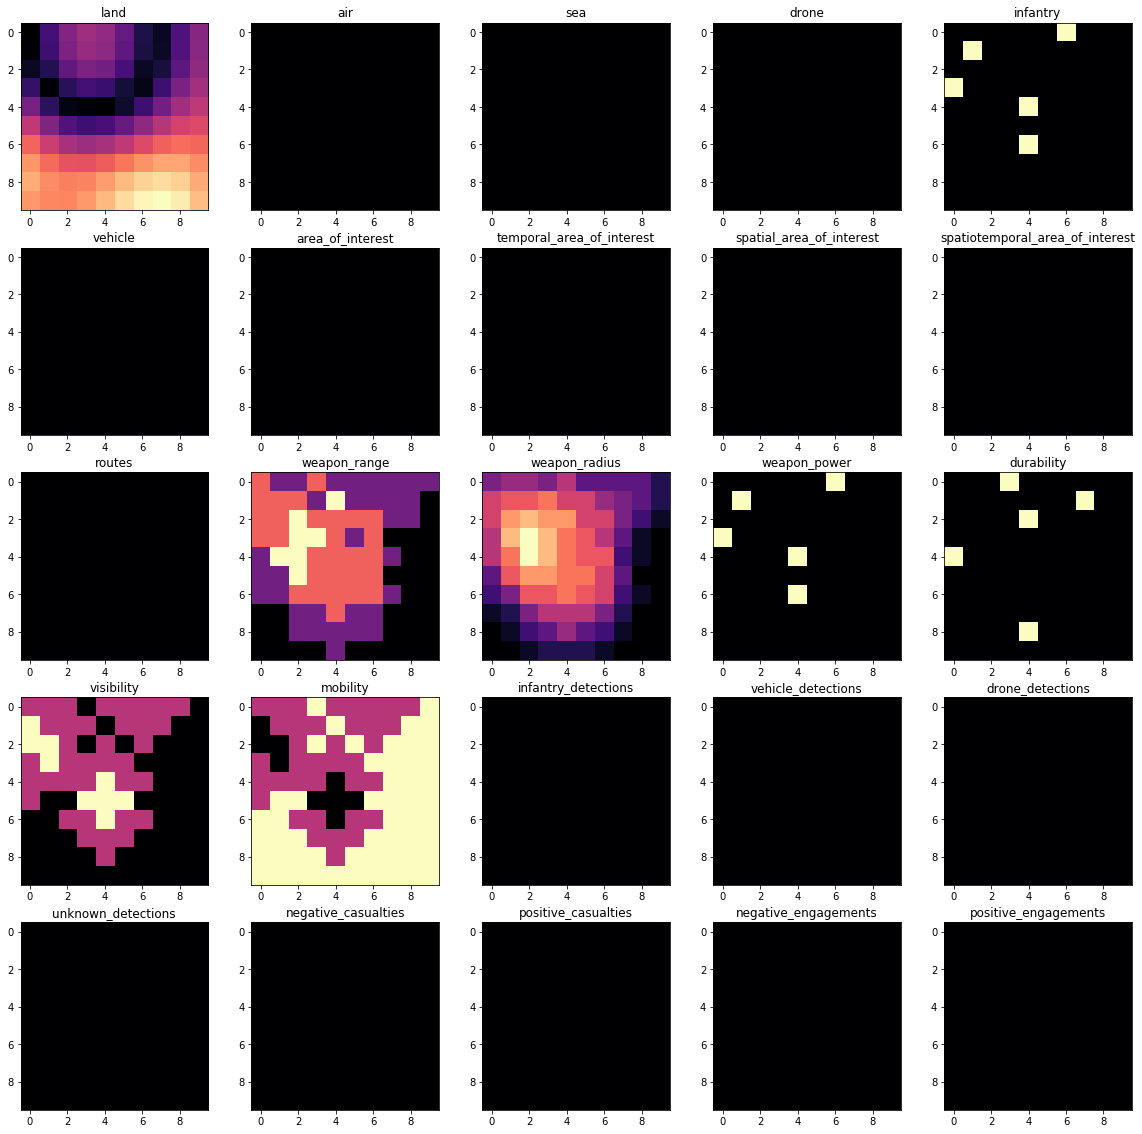

In [8]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()



step 1


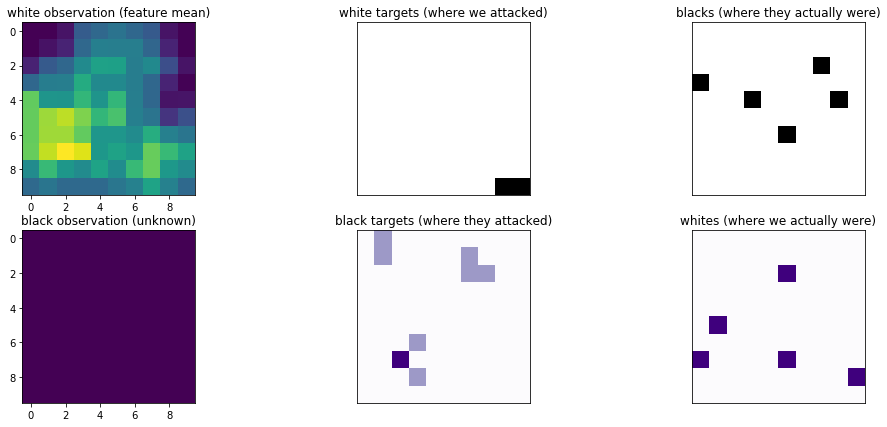



step 2


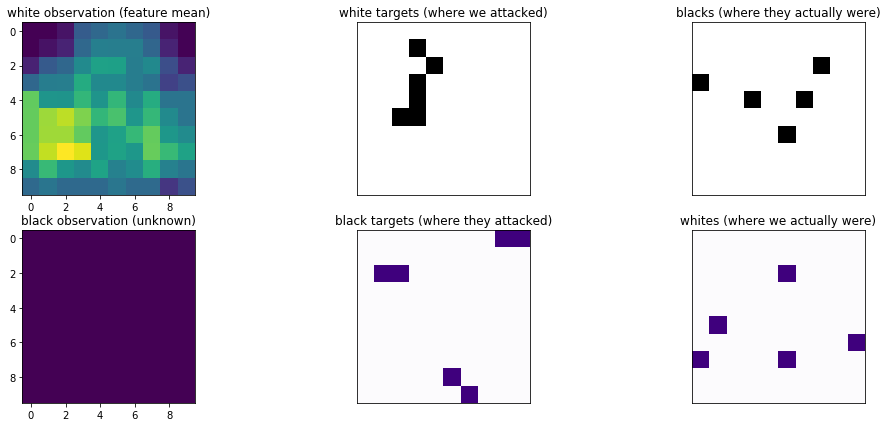



step 3


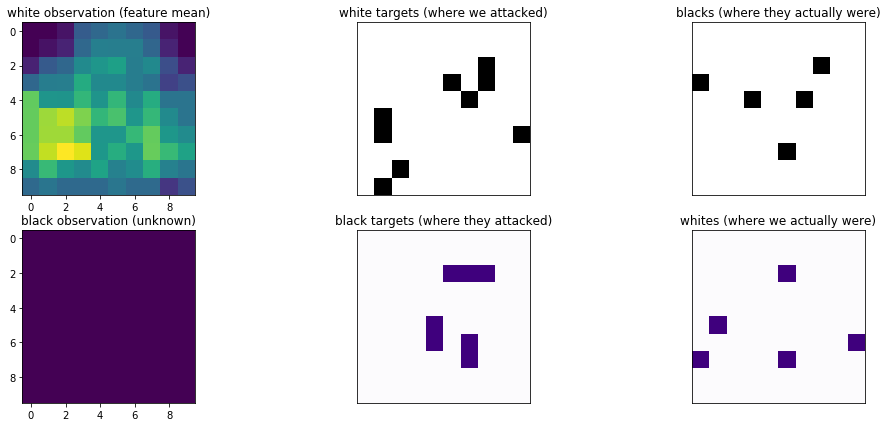



step 4


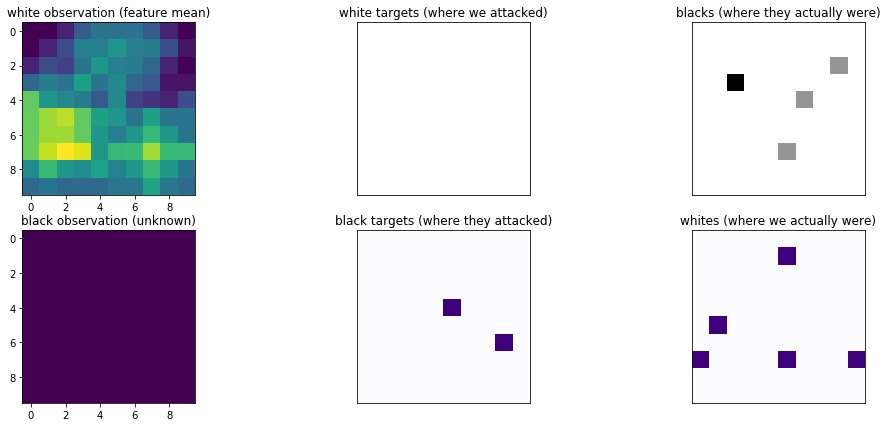



step 5


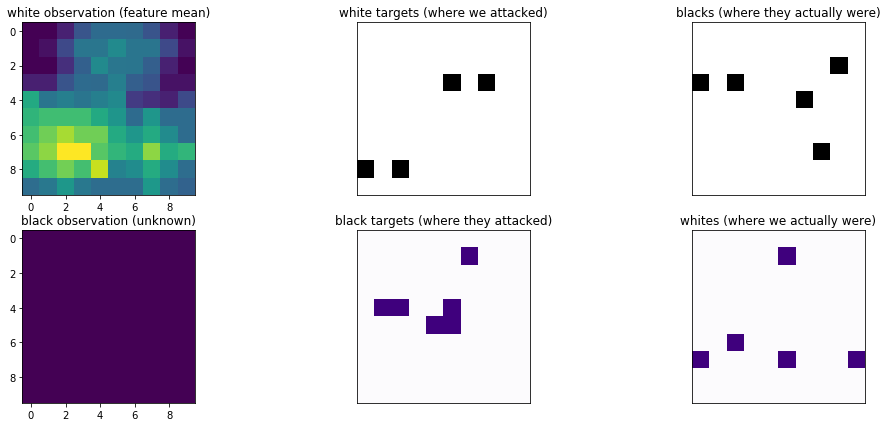



step 6


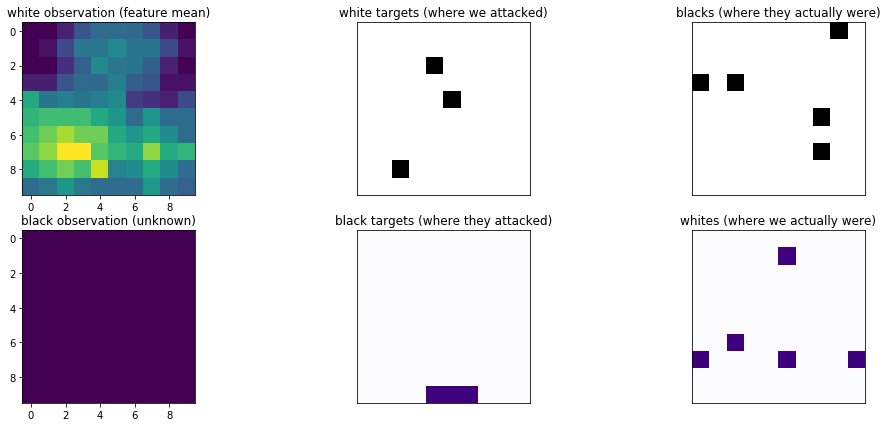



step 7


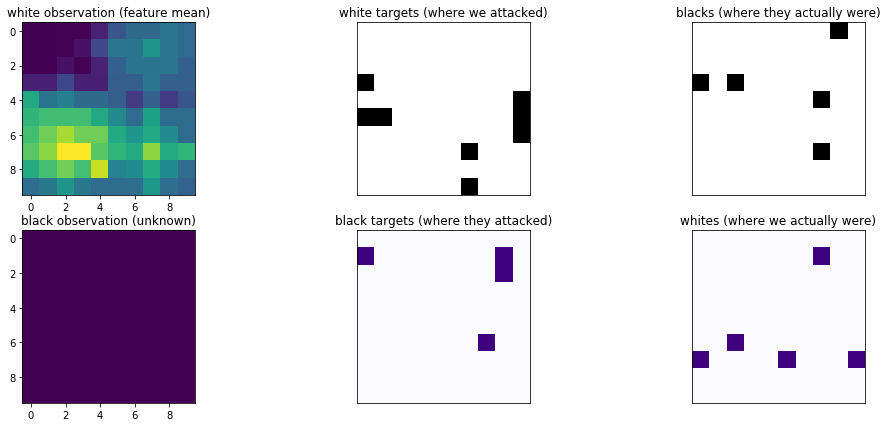



step 8


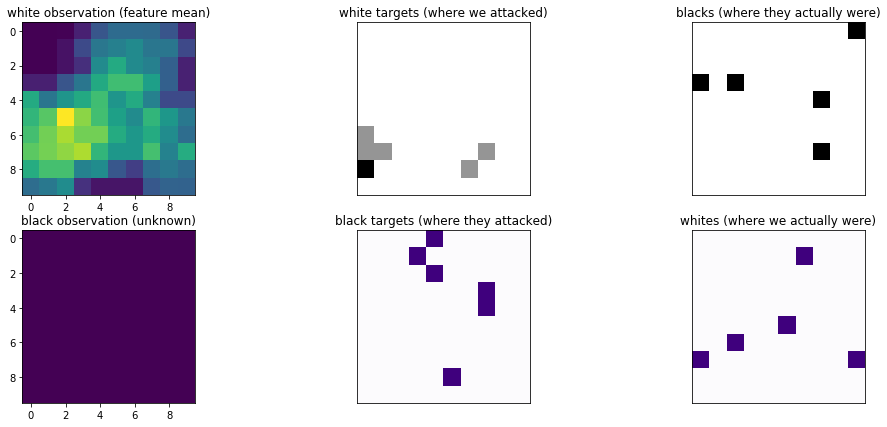

In [9]:
sim.reset()
terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metadata = sim.step(whites, blacks)
    state = sprime
           
    print('\n\nstep', sim.timer)
    
    fig,axs = mp.subplots(2,3, figsize=(17,7))
    ((ax1,ax2,ax3),(ax4,ax5,ax6)) = axs
    for ax in [ax2,ax3,ax5,ax6]: ax.set_xticks([]), ax.set_yticks([])
    white_obs = sim.observation(positive=sim.whites)

    ax1.set_title('white observation (feature mean)')
    ax1.imshow(np.mean(white_obs, axis=0))
    
    ax2.set_title(r'white targets (where we attacked)')
    ax2.imshow(metadata['positive_damage_map'], cmap='Greys')
   
    ax3.set_title('blacks (where they actually were)')
    ax3.imshow(metadata['black_map'], cmap='Greys')
              
    ax4.set_title('black observation (unknown)')
    ax4.imshow(np.zeros(sim.shape))
    
    ax5.set_title('black targets (where they attacked)')
    ax5.imshow(metadata['negative_damage_map'], cmap='Purples')
    
    ax6.set_title('whites (where we actually were)')
    ax6.imshow(metadata['white_map'], cmap='Purples')
    
    mp.show()
    
    if len(metadata['positive_casualties']) > 0 or len(metadata['negative_casualties']) > 0:
        print('White Kills:', metadata['positive_casualties'])
        for ent in metadata['positive_casualties']: print(ent.id)
        print('Black Kills:', metadata['negative_casualties'])
        for ent in metadata['negative_casualties']: print(ent.id)

    if sim.timer == 2**3: break